In [1]:
import os
from dotenv import load_dotenv 
load_dotenv("../../constants/.env")

api_key = os.environ.get('BINANCE_KEY')
secret_key = os.environ.get('BINANCE_SECRET')

In [2]:
import pandas as pd

In [3]:
pair='BTCUSDT'
granularity = '5m'

In [4]:
df = pd.read_pickle(f"crypto/{pair}_{granularity}.pkl")

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
df.tail()

Time      Open      High       Low     Close     Volume
192940 2024-10-31 23:40:00  70525.07  70559.34  70462.00  70476.00   87.33341
192941 2024-10-31 23:45:00  70476.01  70476.01  70422.00  70433.99   51.00845
192942 2024-10-31 23:50:00  70434.00  70443.69  70339.79  70346.00  154.34229
192943 2024-10-31 23:55:00  70346.00  70358.26  70292.00  70292.01   81.72139
192944 2024-11-01 00:00:00  70292.01  70354.77  70248.96  70349.67  107.43098

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

def analisar_distribuicao(df, coluna='Close', k=1, remover_outliers=True):
    """
    Analisa a distribuição normal das variações percentuais de preços e remove outliers, se necessário.
    
    Parâmetros:
        df (pd.DataFrame): DataFrame contendo os preços.
        coluna (str): Nome da coluna com os preços de fechamento.
        k (float): Fator multiplicador para definir os limites (kσ).
                   - Exemplo de valores e implicações:
                     - k=1: Captura aproximadamente 68% dos dados (limite ±1σ).
                     - k=2: Captura aproximadamente 95% dos dados (limite ±2σ).
                     - k=3: Captura aproximadamente 99.7% dos dados (limite ±3σ).
        remover_outliers (bool): Se True, remove valores fora dos limites definidos por kσ.
        
    Retorna:
        dict: Contendo média, desvio padrão e limites baseados na distribuição.
    """
    # Calcular variação percentual
    df['var_percentual'] = df[coluna].pct_change() * 100
    variacoes = df['var_percentual'].dropna()
    
    # Calcular média e desvio padrão
    media = variacoes.mean()
    desvio_padrao = variacoes.std()
    
    # Definir limites baseado no multiplicador k
    limite_alta = media + k * desvio_padrao
    limite_baixa = media - k * desvio_padrao
    
    # Remover outliers, se ativado
    if remover_outliers:
        variacoes = variacoes[(variacoes >= 5*limite_baixa) & (variacoes <= 5*limite_alta)]
    
    # Gerar dados para a curva normal
    x = np.linspace(variacoes.min(), variacoes.max(), 1000)
    curva = norm.pdf(x, media, desvio_padrao)
    
    # Plotar histograma e curva
    plt.figure(figsize=(10, 6))
    plt.hist(variacoes, bins=30, density=True, alpha=0.6, color='skyblue', label='Histograma')
    plt.plot(x, curva, color='red', label='Distribuição Normal')
    plt.axvline(media, color='black', linestyle='--', label='Média (μ)')
    plt.axvline(limite_alta, color='green', linestyle='--', label=f'+{k}σ ({limite_alta:.2f})')
    plt.axvline(limite_baixa, color='green', linestyle='--', label=f'-{k}σ ({limite_baixa:.2f})')
    plt.title('Distribuição Normal das Variações Percentuais')
    plt.xlabel('Variação Percentual (%)')
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()
    
    # Retornar estatísticas
    return {
        'media': media,
        'desvio_padrao': desvio_padrao,
        'limite_alta': limite_alta,
        'limite_baixa': limite_baixa
    }


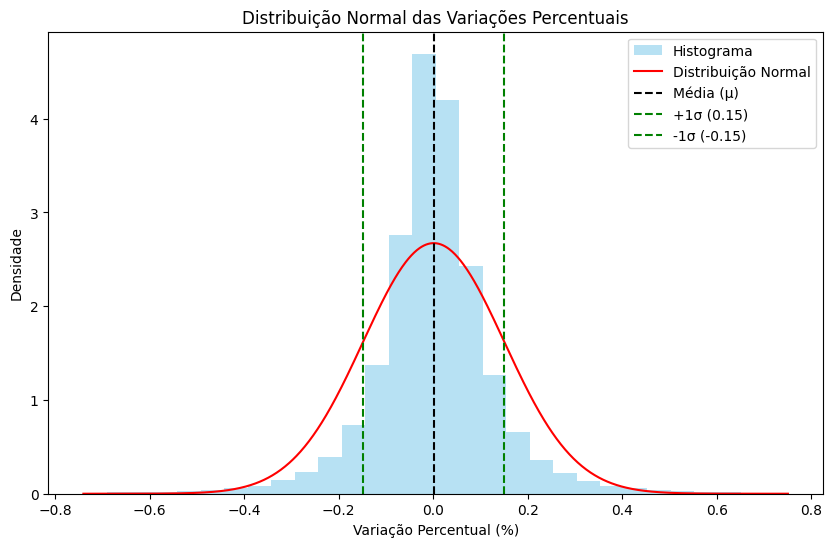

Resultados da Distribuição:
{'media': np.float64(0.0008620031206369862), 'desvio_padrao': np.float64(0.14927441253868215), 'limite_alta': np.float64(0.15013641565931912), 'limite_baixa': np.float64(-0.14841240941804518)}


In [8]:
resultados = analisar_distribuicao(df)
print("Resultados da Distribuição:")
print(resultados)

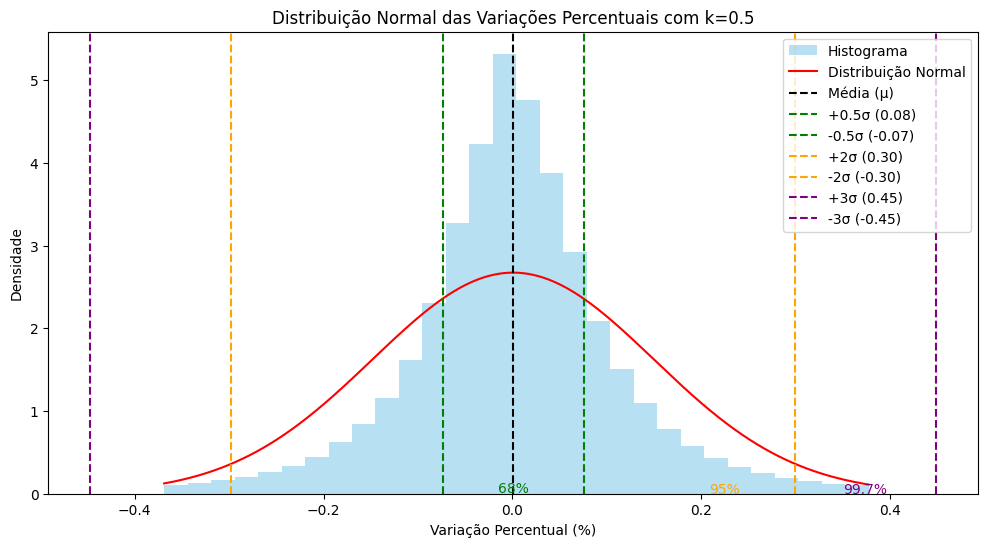

{'media': np.float64(0.0008620031206369862),
 'desvio_padrao': np.float64(0.14927441253868215),
 'limite_alta': np.float64(0.07549920938997806),
 'limite_baixa': np.float64(-0.07377520314870409)}

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

def analisar_distribuicao_e_plotar(df, coluna='Close', k=1, remover_outliers=True):
    """
    Analisa a distribuição normal das variações percentuais, inclui porcentagens no gráfico e remove outliers.
    
    Parâmetros:
        df (pd.DataFrame): DataFrame contendo os preços.
        coluna (str): Nome da coluna com os preços de fechamento.
        k (float): Fator multiplicador para definir os limites (kσ).
                   - Exemplo de valores e implicações:
                     - k=1: Captura aproximadamente 68% dos dados (limite ±1σ).
                     - k=2: Captura aproximadamente 95% dos dados (limite ±2σ).
                     - k=3: Captura aproximadamente 99.7% dos dados (limite ±3σ).
        remover_outliers (bool): Se True, remove valores fora dos limites definidos por kσ.
    """
    # Calcular variação percentual
    df['var_percentual'] = df[coluna].pct_change() * 100
    variacoes = df['var_percentual'].dropna()
    
    # Calcular média e desvio padrão
    media = variacoes.mean()
    desvio_padrao = variacoes.std()

    k=0.5
    # Definir limites baseado no multiplicador k
    limite_alta = media + k * desvio_padrao
    limite_baixa = media - k * desvio_padrao
    
    # Remover outliers, se ativado
    if remover_outliers:
        variacoes = variacoes[(variacoes >= 5*limite_baixa) & (variacoes <= 5*limite_alta)]
    
    # Gerar dados para a curva normal
    x = np.linspace(variacoes.min(), variacoes.max(), 1000)
    curva = norm.pdf(x, media, desvio_padrao)
    
    # Plotar histograma e curva
    plt.figure(figsize=(12, 6))
    plt.hist(variacoes, bins=30, density=True, alpha=0.6, color='skyblue', label='Histograma')
    plt.plot(x, curva, color='red', label='Distribuição Normal')
    
    # Adicionar linhas verticais para média e desvios padrão
    plt.axvline(media, color='black', linestyle='--', label='Média (μ)')
    plt.axvline(media + k * desvio_padrao, color='green', linestyle='--', label=f'+{k}σ ({limite_alta:.2f})')
    plt.axvline(media - k * desvio_padrao, color='green', linestyle='--', label=f'-{k}σ ({limite_baixa:.2f})')
    plt.axvline(media + 2 * desvio_padrao, color='orange', linestyle='--', label=f'+2σ ({media + 2 * desvio_padrao:.2f})')
    plt.axvline(media - 2 * desvio_padrao, color='orange', linestyle='--', label=f'-2σ ({media - 2 * desvio_padrao:.2f})')
    plt.axvline(media + 3 * desvio_padrao, color='purple', linestyle='--', label=f'+3σ ({media + 3 * desvio_padrao:.2f})')
    plt.axvline(media - 3 * desvio_padrao, color='purple', linestyle='--', label=f'-3σ ({media - 3 * desvio_padrao:.2f})')
    
    # Adicionar texto explicativo das porcentagens
    plt.text(media, 0.02, f"68%", color='green', fontsize=10, ha='center')
    plt.text(media + 1.5 * desvio_padrao, 0.01, "95%", color='orange', fontsize=10, ha='center')
    plt.text(media + 2.5 * desvio_padrao, 0.005, "99.7%", color='purple', fontsize=10, ha='center')
    
    # Configurar título e legendas
    plt.title(f'Distribuição Normal das Variações Percentuais com k={k}')
    plt.xlabel('Variação Percentual (%)')
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()
    
    # Retornar estatísticas
    return {
        'media': media,
        'desvio_padrao': desvio_padrao,
        'limite_alta': limite_alta,
        'limite_baixa': limite_baixa
    }


# Exemplo de uso
# Suponha que você tenha um DataFrame `df` com uma coluna 'Close'
analisar_distribuicao_e_plotar(df)


In [10]:
df.head()

Time      Open      High       Low     Close     Volume  \
0 2023-01-01 00:00:00  16541.77  16544.76  16527.51  16535.38  486.60903   
1 2023-01-01 00:05:00  16534.91  16540.43  16522.55  16526.67  391.19043   
2 2023-01-01 00:10:00  16526.67  16530.87  16520.00  16520.69  294.73889   
3 2023-01-01 00:15:00  16521.26  16537.73  16517.72  16534.94  481.18777   
4 2023-01-01 00:20:00  16534.94  16540.66  16532.33  16535.54  309.53189   

   var_percentual  
0             NaN  
1       -0.052675  
2       -0.036184  
3        0.086255  
4        0.003629

In [11]:
def classificar_variacao_com_distribuicao(var, media, desvio_padrao):
    limite_alta = media + 0.5*desvio_padrao
    limite_baixa = media - 0.5*desvio_padrao
    
    if var > limite_alta:
        return "Alta"
    elif var < limite_baixa:
        return "Baixa"
    elif var < limite_alta and var > 0:
        return "Leve Alta"
    elif var > limite_baixa and var < 0:
        return "Leve Baixa"

# Aplicar classificação ao DataFrame
media = resultados['media']
desvio_padrao = resultados['desvio_padrao']
df['classificacao'] = df['var_percentual'].apply(
    lambda var: classificar_variacao_com_distribuicao(var, media, desvio_padrao)
)


In [12]:
df.head()

Time      Open      High       Low     Close     Volume  \
0 2023-01-01 00:00:00  16541.77  16544.76  16527.51  16535.38  486.60903   
1 2023-01-01 00:05:00  16534.91  16540.43  16522.55  16526.67  391.19043   
2 2023-01-01 00:10:00  16526.67  16530.87  16520.00  16520.69  294.73889   
3 2023-01-01 00:15:00  16521.26  16537.73  16517.72  16534.94  481.18777   
4 2023-01-01 00:20:00  16534.94  16540.66  16532.33  16535.54  309.53189   

   var_percentual classificacao  
0             NaN          None  
1       -0.052675    Leve Baixa  
2       -0.036184    Leve Baixa  
3        0.086255          Alta  
4        0.003629     Leve Alta

In [13]:
df.classificacao.value_counts()

classificacao
Leve Alta     56869
Leve Baixa    56604
Alta          39568
Baixa         39132
Name: count, dtype: int64

In [14]:
def criar_tuplas(df, coluna='classificacao'):
    """
    Cria tuplas de 3 estados consecutivos e adiciona uma coluna com as tuplas no DataFrame original.

    Parâmetros:
        df (pd.DataFrame): DataFrame contendo os dados classificados.
        coluna (str): Nome da coluna com as classificações (Alta, Estável, Baixa).

    Retorna:
        list: Lista de tuplas com 3 estados consecutivos.
    """
    estados = df[coluna].values
    # Gerar tuplas consecutivas
    # tuplas = [(estados[i], estados[i + 1], estados[i + 2]) for i in range(len(estados) - 2)]
    tuplas = [(estados[i], estados[i + 1], estados[i + 2], estados[i + 3]) for i in range(len(estados) - 3)]
    
    df['tuplas'] = [None] * len(df)  # Inicializar a coluna com None
    tt = [None, None, None]+tuplas
    df['tuplas'] = tt  # Preencher as tuplas a partir da 3ª linha (índice 2)
    df.dropna(inplace=True)
    return tuplas


In [15]:
# Criar as tuplas
tuplas_teste = criar_tuplas(df, coluna='classificacao')
len(tuplas_teste)

192942

In [16]:
df.tail(20)

Time      Open      High       Low     Close     Volume  \
192925 2024-10-31 22:25:00  70213.27  70292.00  70179.90  70292.00   28.28691   
192926 2024-10-31 22:30:00  70292.00  70345.92  70264.00  70333.33   59.13352   
192927 2024-10-31 22:35:00  70333.34  70454.00  70333.33  70408.63   57.27275   
192928 2024-10-31 22:40:00  70408.63  70492.10  70402.00  70492.09   49.44186   
192929 2024-10-31 22:45:00  70492.09  70543.98  70472.89  70506.00   56.04749   
192930 2024-10-31 22:50:00  70506.00  70506.01  70429.13  70463.52   71.73550   
192931 2024-10-31 22:55:00  70463.53  70513.47  70430.14  70480.00   37.95054   
192932 2024-10-31 23:00:00  70479.99  70618.63  70460.58  70524.90  139.70192   
192933 2024-10-31 23:05:00  70524.90  70524.90  70402.00  70426.01   40.21647   
192934 2024-10-31 23:10:00  70426.01  70499.99  70402.00  70496.46   48.62536   
192935 2024-10-31 23:15:00  70496.47  70586.00  70494.20  70579.99   35.46521   
192936 2024-10-31 23:20:00  70580.00  70624.00  70561.83  70568.12   74.17420   
192937 2024-10-31 23:25:00  70568.11  70646.00  70544.56  70620.56   36.75331   
192938 2024-10-31 23:30:00  70620.57  70642.00  70580.61  70584.52   39.65350   
192939 2024-10-31 23:35:00  70584.52  70654.76  70518.00  70525.07   60.78634   
192940 2024-10-31 23:40:00  70525.07  70559.34  70462.00  70476.00   87.33341   
192941 2024-10-31 23:45:00  70476.01  70476.01  70422.00  70433.99   51.00845   
192942 2024-10-31 23:50:00  70434.00  70443.69  70339.79  70346.00  154.34229   
192943 2024-10-31 23:55:00  70346.00  70358.26  70292.00  70292.01   81.72139   
192944 2024-11-01 00:00:00  70292.01  70354.77  70248.96  70349.67  107.43098   

        var_percentual classificacao  \
192925        0.112116          Alta   
192926        0.058798     Leve Alta   
192927        0.107062          Alta   
192928        0.118537          Alta   
192929        0.019733     Leve Alta   
192930       -0.060250    Leve Baixa   
192931        0.023388     Leve Alta   
192932        0.063706     Leve Alta   
192933       -0.140220         Baixa   
192934        0.100034          Alta   
192935        0.118488          Alta   
192936       -0.016818    Leve Baixa   
192937        0.074311     Leve Alta   
192938       -0.051033    Leve Baixa   
192939       -0.084225         Baixa   
192940       -0.069578    Leve Baixa   
192941       -0.059609    Leve Baixa   
192942       -0.124925         Baixa   
192943       -0.076749         Baixa   
192944        0.082029          Alta   

                                               tuplas  
192925          (Leve Baixa, Baixa, Leve Baixa, Alta)  
192926           (Baixa, Leve Baixa, Alta, Leve Alta)  
192927            (Leve Baixa, Alta, Leve Alta, Alta)  
192928                  (Alta, Leve Alta, Alta, Alta)  
192929             (Leve Alta, Alta, Alta, Leve Alta)  
192930            (Alta, Alta, Leve Alta, Leve Baixa)  
192931       (Alta, Leve Alta, Leve Baixa, Leve Alta)  
192932  (Leve Alta, Leve Baixa, Leve Alta, Leve Alta)  
192933      (Leve Baixa, Leve Alta, Leve Alta, Baixa)  
192934            (Leve Alta, Leve Alta, Baixa, Alta)  
192935                 (Leve Alta, Baixa, Alta, Alta)  
192936                (Baixa, Alta, Alta, Leve Baixa)  
192937            (Alta, Alta, Leve Baixa, Leve Alta)  
192938      (Alta, Leve Baixa, Leve Alta, Leve Baixa)  
192939     (Leve Baixa, Leve Alta, Leve Baixa, Baixa)  
192940     (Leve Alta, Leve Baixa, Baixa, Leve Baixa)  
192941    (Leve Baixa, Baixa, Leve Baixa, Leve Baixa)  
192942         (Baixa, Leve Baixa, Leve Baixa, Baixa)  
192943         (Leve Baixa, Leve Baixa, Baixa, Baixa)  
192944               (Leve Baixa, Baixa, Baixa, Alta)

In [17]:
# Criar as tuplas
tuplas_teste = criar_tuplas(df, coluna='classificacao')

# Contar frequência de cada tupla
from collections import Counter
tupla_frequencias = Counter(tuplas_teste)

# Exibir as tuplas mais frequentes
print("Tuplas mais frequentes:")
for tupla, frequencia in tupla_frequencias.most_common(100):
    print(f"{tupla}: {frequencia}")


Tuplas mais frequentes:
('Leve Alta', 'Leve Baixa', 'Leve Baixa', 'Leve Baixa'): 2889
('Leve Baixa', 'Leve Baixa', 'Leve Alta', 'Leve Alta'): 2876
('Leve Baixa', 'Leve Alta', 'Leve Baixa', 'Leve Baixa'): 2847
('Leve Alta', 'Leve Alta', 'Leve Baixa', 'Leve Baixa'): 2831
('Leve Alta', 'Leve Baixa', 'Leve Baixa', 'Leve Alta'): 2823
('Leve Baixa', 'Leve Baixa', 'Leve Baixa', 'Leve Alta'): 2806
('Leve Baixa', 'Leve Alta', 'Leve Alta', 'Leve Alta'): 2800
('Leve Baixa', 'Leve Alta', 'Leve Alta', 'Leve Baixa'): 2795
('Leve Alta', 'Leve Alta', 'Leve Alta', 'Leve Baixa'): 2762
('Leve Alta', 'Leve Baixa', 'Leve Alta', 'Leve Baixa'): 2722
('Leve Baixa', 'Leve Baixa', 'Leve Alta', 'Leve Baixa'): 2686
('Leve Alta', 'Leve Alta', 'Leve Baixa', 'Leve Alta'): 2677
('Leve Baixa', 'Leve Baixa', 'Leve Baixa', 'Leve Baixa'): 2673
('Leve Alta', 'Leve Baixa', 'Leve Alta', 'Leve Alta'): 2662
('Leve Baixa', 'Leve Alta', 'Leve Baixa', 'Leve Alta'): 2656
('Leve Alta', 'Leve Alta', 'Leve Alta', 'Leve Alta'): 2488


In [18]:
df.tail()

Time      Open      High       Low     Close     Volume  \
192940 2024-10-31 23:40:00  70525.07  70559.34  70462.00  70476.00   87.33341   
192941 2024-10-31 23:45:00  70476.01  70476.01  70422.00  70433.99   51.00845   
192942 2024-10-31 23:50:00  70434.00  70443.69  70339.79  70346.00  154.34229   
192943 2024-10-31 23:55:00  70346.00  70358.26  70292.00  70292.01   81.72139   
192944 2024-11-01 00:00:00  70292.01  70354.77  70248.96  70349.67  107.43098   

        var_percentual classificacao  \
192940       -0.069578    Leve Baixa   
192941       -0.059609    Leve Baixa   
192942       -0.124925         Baixa   
192943       -0.076749         Baixa   
192944        0.082029          Alta   

                                             tuplas  
192940   (Leve Alta, Leve Baixa, Baixa, Leve Baixa)  
192941  (Leve Baixa, Baixa, Leve Baixa, Leve Baixa)  
192942       (Baixa, Leve Baixa, Leve Baixa, Baixa)  
192943       (Leve Baixa, Leve Baixa, Baixa, Baixa)  
192944             (Leve Baixa, Baixa, Baixa, Alta)

In [19]:
from sklearn.model_selection import train_test_split

# Divisão do DataFrame
df_treino, df_teste = train_test_split(df, test_size=0.3, shuffle=False)

# Criar tuplas de 3 estados para treinamento e teste
tuplas_treino = criar_tuplas(df_treino)
tuplas_teste = criar_tuplas(df_teste)


In [20]:
# def montar_matriz_transicao(tuplas):
#     """
#     Monta a matriz de transição baseada em tuplas de 3 estados.

#     Parâmetros:
#         tuplas (list): Lista de tuplas com 3 estados consecutivos.

#     Retorna:
#         dict: Matriz de transição representada como um dicionário.
#     """
#     # Criar dicionário para contar as transições
#     transicoes = {}
#     for i in range(len(tuplas) - 1):
#         estado_atual = tuplas[i]
#         estado_proximo = tuplas[i + 1]
#         if estado_atual not in transicoes:
#             transicoes[estado_atual] = {}
#         if estado_proximo not in transicoes[estado_atual]:
#             transicoes[estado_atual][estado_proximo] = 0
#         transicoes[estado_atual][estado_proximo] += 1

#     # Normalizar para obter probabilidades
#     matriz_transicao = {}
#     for estado_atual, transicoes_proximas in transicoes.items():
#         total_transicoes = sum(transicoes_proximas.values())
#         matriz_transicao[estado_atual] = {
#             estado_proximo: count / total_transicoes
#             for estado_proximo, count in transicoes_proximas.items()
#         }
    
#     return matriz_transicao




def montar_matriz_transicao_corrigida(tuplas):
    """
    Monta a matriz de transição considerando todos os estados possíveis.

    Parâmetros:
        tuplas (list): Lista de tuplas com 3 estados consecutivos.

    Retorna:
        dict: Matriz de transição representada como um dicionário.
    """
    # Criar o conjunto de todos os estados únicos
    todos_estados = set(tuplas)

    # Criar dicionário para contar as transições
    transicoes = {}
    for i in range(len(tuplas) - 1):
        estado_atual = tuplas[i]
        estado_proximo = tuplas[i + 1]
        if estado_atual not in transicoes:
            transicoes[estado_atual] = {}
        if estado_proximo not in transicoes[estado_atual]:
            transicoes[estado_atual][estado_proximo] = 0
        transicoes[estado_atual][estado_proximo] += 1

    # Garantir que todos os estados possíveis apareçam como destino
    matriz_transicao = {}
    for estado_atual in todos_estados:
        transicoes_proximas = transicoes.get(estado_atual, {})
        total_transicoes = sum(transicoes_proximas.values())

        # Inicializar com zero para todos os estados possíveis
        matriz_transicao[estado_atual] = {
            estado_proximo: transicoes_proximas.get(estado_proximo, 0) / (total_transicoes or 1)
            for estado_proximo in todos_estados
        }

    return matriz_transicao




# Montar a matriz de transição com o conjunto de treinamento
matriz_transicao = montar_matriz_transicao_corrigida(tuplas_treino)


In [21]:
matriz_transicao

{('Baixa',
  'Leve Alta',
  'Baixa',
  'Leve Alta'): {('Baixa', 'Leve Alta', 'Baixa', 'Leve Alta'): 0.0, ('Alta',
   'Alta',
   'Baixa',
   'Baixa'): 0.0, ('Leve Alta',
   'Leve Baixa',
   'Leve Baixa',
   'Alta'): 0.0, ('Leve Baixa', 'Alta', 'Alta', 'Baixa'): 0.0, ('Baixa',
   'Baixa',
   'Leve Alta',
   'Leve Alta'): 0.0, ('Leve Alta',
   'Baixa',
   'Alta',
   'Leve Baixa'): 0.0, ('Leve Alta', 'Baixa', 'Baixa', 'Leve Alta'): 0.0, ('Leve Alta',
   'Alta',
   'Alta',
   'Leve Baixa'): 0.0, ('Leve Baixa',
   'Leve Alta',
   'Alta',
   'Baixa'): 0.0, ('Alta', 'Baixa', 'Leve Baixa', 'Leve Baixa'): 0.0, ('Baixa',
   'Leve Alta',
   'Alta',
   'Leve Baixa'): 0.0, ('Baixa',
   'Baixa',
   'Leve Baixa',
   'Leve Alta'): 0.0, ('Alta', 'Leve Baixa', 'Leve Baixa', 'Alta'): 0.0, ('Alta',
   'Leve Alta',
   'Alta',
   'Leve Alta'): 0.0, ('Leve Baixa',
   'Leve Baixa',
   'Leve Baixa',
   'Leve Baixa'): 0.0, ('Alta',
   'Leve Alta',
   'Leve Alta',
   'Baixa'): 0.0, ('Leve Alta', 'Leve Alta', 'Bai

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plotar_matriz_transicao_heatmap(matriz_transicao, titulo="Matriz de Transição", largura=20, altura=15):
    """
    Plota um heatmap com a porcentagem de cada transição na matriz de transição.

    Parâmetros:
        matriz_transicao (dict): Matriz de transição representada como um dicionário.
        titulo (str): Título do gráfico.
        largura (int): Largura da figura.
        altura (int): Altura da figura.
    """
    # Transformar a matriz de transição em DataFrame para facilitar o plot
    data = []
    estados_origem = []
    estados_destino = []

    for estado_atual, transicoes in matriz_transicao.items():
        for estado_proximo, probabilidade in transicoes.items():
            estados_origem.append(estado_atual)
            estados_destino.append(estado_proximo)
            data.append(probabilidade)

    # Criar DataFrame
    df_transicao = pd.DataFrame({
        "Origem": estados_origem,
        "Destino": estados_destino,
        "Probabilidade": data
    })

    # Pivotar o DataFrame para formato adequado ao heatmap
    heatmap_data = df_transicao.pivot(
        index="Origem", 
        columns="Destino", 
        values="Probabilidade"
    ).fillna(0)

    # Plotar o heatmap
    plt.figure(figsize=(largura, altura))
    sns.heatmap(
        heatmap_data,
        annot=True,  # Exibir os valores
        fmt=".2%",   # Mostrar porcentagens
        cmap="Blues",  # Escolher esquema de cores
        cbar_kws={"label": "Probabilidade (%)"}  # Legenda do colorbar
    )

    # Configurações do gráfico
    plt.title(titulo, fontsize=16)
    plt.xlabel("Estado de Destino", fontsize=12)
    plt.ylabel("Estado de Origem", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

    plt.savefig("img_plot.png", dpi=300)

    
    plt.show()

In [23]:
# plotar_matriz_transicao_heatmap(
#     matriz_transicao, 
#     titulo="Heatmap da Matriz de Transição",
#     largura=50,  # Aumentar a largura para visualizar melhor os números
#     altura=30    # Ajustar a altura conforme necessário
# )


In [24]:
def realizar_backtest(matriz_transicao, tuplas_teste):
    """
    Realiza um backtest com base na matriz de transição e tuplas de teste.

    Parâmetros:
        matriz_transicao (dict): Matriz de transição baseada nas tuplas de treinamento.
        tuplas_teste (list): Lista de tuplas com 3 estados consecutivos para teste.

    Retorna:
        dict: Métricas do backtest, como precisão.
    """
    acertos = 0
    total_transicoes = len(tuplas_teste) - 1

    for i in range(total_transicoes):
        estado_atual = tuplas_teste[i]
        estado_real = tuplas_teste[i + 1]

        if estado_atual in matriz_transicao:
            transicoes_proximas = matriz_transicao[estado_atual]
            if transicoes_proximas:
                estado_previsto = max(transicoes_proximas, key=transicoes_proximas.get)  # Estado com maior probabilidade
                if estado_previsto == estado_real:
                    acertos += 1

    precisao = acertos / total_transicoes if total_transicoes > 0 else 0
    return {
        "acertos": acertos,
        "total": total_transicoes,
        "precisao": precisao
    }

# Realizar o backtest com a matriz de transição e tuplas de teste
resultados_backtest = realizar_backtest(matriz_transicao, tuplas_teste)
print("Resultados do Backtest:", resultados_backtest)


Resultados do Backtest: {'acertos': 18124, 'total': 57647, 'precisao': 0.3143962391798359}


In [25]:
import pandas as pd

def matriz_transicao_para_dataframe(matriz_transicao):
    """
    Transforma uma matriz de transição em um DataFrame legível.

    Parâmetros:
        matriz_transicao (dict): Matriz de transição em formato de dicionário.

    Retorna:
        pd.DataFrame: DataFrame contendo as probabilidades de transição.
    """
    # Criar listas para montar o DataFrame
    estados_atual = []
    estados_proximo = []
    probabilidades = []

    # Iterar pela matriz de transição
    for estado_atual, transicoes in matriz_transicao.items():
        for estado_proximo, probabilidade in transicoes.items():
            estados_atual.append(estado_atual)
            estados_proximo.append(estado_proximo)
            probabilidades.append(probabilidade)

    # Criar o DataFrame
    df = pd.DataFrame({
        'Estado Atual': estados_atual,
        'Próximo Estado': estados_proximo,
        'Probabilidade': probabilidades
    })

    # Ordenar o DataFrame para facilitar leitura
    df = df.sort_values(by=['Estado Atual', 'Probabilidade'], ascending=[True, False])
    return df


In [26]:
df_transicao = matriz_transicao_para_dataframe(matriz_transicao)
df_transicao.head()


Estado Atual                        Próximo Estado  \
23340  (Alta, Alta, Alta, Alta)             (Alta, Alta, Alta, Baixa)   
23387  (Alta, Alta, Alta, Alta)              (Alta, Alta, Alta, Alta)   
23539  (Alta, Alta, Alta, Alta)        (Alta, Alta, Alta, Leve Baixa)   
23382  (Alta, Alta, Alta, Alta)         (Alta, Alta, Alta, Leve Alta)   
23296  (Alta, Alta, Alta, Alta)  (Baixa, Leve Alta, Baixa, Leve Alta)   

       Probabilidade  
23340       0.442940  
23387       0.299807  
23539       0.143133  
23382       0.114120  
23296       0.000000

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

def avaliar_desempenho_por_classe_codificado(matriz_transicao, tuplas_teste):
    """
    Avalia o desempenho do modelo de Cadeia de Markov por classe após codificar os estados.

    Parâmetros:
        matriz_transicao (dict): Matriz de transição baseada nas tuplas de treinamento.
        tuplas_teste (list): Lista de tuplas com 3 estados consecutivos para teste.

    Retorna:
        dict: Matriz de confusão, relatório de métricas e listas de rótulos reais e previstos.
    """
    # Criar mapeamento de tuplas para rótulos únicos
    todos_estados = set(matriz_transicao.keys()).union(
        {dest for trans in matriz_transicao.values() for dest in trans.keys()}
    )
    estado_para_id = {estado: idx for idx, estado in enumerate(todos_estados)}
    id_para_estado = {idx: estado for estado, idx in estado_para_id.items()}

    # Codificar os estados no conjunto de teste
    y_true = []
    y_pred = []

    for i in range(len(tuplas_teste) - 1):
        estado_atual = tuplas_teste[i]
        estado_real = tuplas_teste[i + 1]

        # Previsão com base na matriz de transição
        if estado_atual in matriz_transicao:
            transicoes_proximas = matriz_transicao[estado_atual]
            if transicoes_proximas:
                estado_previsto = max(transicoes_proximas, key=transicoes_proximas.get)
            else:
                estado_previsto = None
        else:
            estado_previsto = None

        # Codificar os estados reais e previstos
        y_true.append(estado_para_id.get(estado_real, -1))  # -1 para estados desconhecidos
        y_pred.append(estado_para_id.get(estado_previsto, -1))

    # Determinar rótulos presentes
    labels_presentes = sorted(set(y_true) | set(y_pred))

    # Criar matriz de confusão e relatório
    matriz_confusao = confusion_matrix(y_true, y_pred, labels=labels_presentes)
    relatorio = classification_report(
        y_true, 
        y_pred, 
        labels=labels_presentes, 
        target_names=[str(id_para_estado[label]) for label in labels_presentes]
    )

    return {
        "matriz_confusao": matriz_confusao,
        "relatorio": relatorio,
        "classes": [id_para_estado[label] for label in labels_presentes],
        "y_true": list(y_true),
        "y_pred": list(y_pred)
    }

# Avaliar desempenho
resultados_avaliacao_codificados = avaliar_desempenho_por_classe_codificado(matriz_transicao, tuplas_teste)

# Visualizar resultados
# print("Matriz de Confusão:\n", resultados_avaliacao_codificados["matriz_confusao"])
# print("\nRelatório de Métricas:\n", resultados_avaliacao_codificados["relatorio"])


/home/jonatas/Documents/fxopen/venv/lib64/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jonatas/Documents/fxopen/venv/lib64/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jonatas/Documents/fxopen/venv/lib64/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [28]:
y_pred = resultados_avaliacao_codificados["y_pred"]
y_true = resultados_avaliacao_codificados["y_true"]

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plotar_matriz_confusao(y_true, y_pred, labels, titulo="Matriz de Confusão"):
    """
    Plota a matriz de confusão como uma matriz de calor.

    Parâmetros:
        y_true (list): Lista de valores reais.
        y_pred (list): Lista de valores previstos.
        labels (list): Lista de rótulos para os estados.
        titulo (str): Título do gráfico.
    """
    # Criar a matriz de confusão
    matriz = confusion_matrix(y_true, y_pred, labels=labels)

    # Configurar o tamanho da figura
    plt.figure(figsize=(10, 8))

    # Plotar matriz como heatmap
    sns.heatmap(
        matriz, 
        annot=True, 
        fmt='d', 
        cmap='Blues', 
        xticklabels=labels, 
        yticklabels=labels,
        cbar=True
    )

    # Configurações do gráfico
    plt.title(titulo)
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [30]:
# Obter os rótulos das classes
labels = resultados_avaliacao_codificados["classes"]

# labels

In [31]:
def plotar_matriz_confusao_decodificada(y_true, y_pred, labels, titulo="Matriz de Confusão"):
    """
    Plota a matriz de confusão como uma matriz de calor, decodificando rótulos numéricos.

    Parâmetros:
        y_true (list): Lista de valores reais codificados.
        y_pred (list): Lista de valores previstos codificados.
        labels (list): Lista de rótulos originais (tuplas) decodificados.
        titulo (str): Título do gráfico.
    """
    # Criar a matriz de confusão
    matriz = confusion_matrix(y_true, y_pred, labels=range(len(labels)))

    # Configurar o tamanho da figura
    plt.figure(figsize=(12, 10))

    # Plotar matriz como heatmap
    sns.heatmap(
        matriz,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=labels,
        yticklabels=labels,
        cbar=True
    )

    # Configurações do gráfico
    plt.title(titulo)
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [32]:
# # Rótulos originais (tuplas decodificadas)
# labels = resultados_avaliacao_codificados["classes"]

# # Plotar a matriz de confusão decodificada
# plotar_matriz_confusao_decodificada(
#     y_true=resultados_avaliacao_codificados["y_true"],
#     y_pred=resultados_avaliacao_codificados["y_pred"],
#     labels=[str(label) for label in labels],  # Converter tuplas para strings
#     titulo="Matriz de Confusão da Cadeia de Markov"
# )


In [33]:
import pandas as pd
from binance.client import Client
import time


# Configurar pandas para exibir células de DataFrame sem quebra de linha
pd.set_option('display.max_colwidth', None)  # Mostra o conteúdo completo das colunas
pd.set_option('display.expand_frame_repr', False)  # Evita quebra horizontal



# Inicializa o cliente da Binance para futuros
client = Client(api_key, secret_key)
# client.FUTURES_URL = "https://fapi.binance.com"  # Configura para a API de Futuros


# Função para buscar os últimos 10 candles
def get_historical_5m_candles(symbol):
    klines = client.futures_klines(symbol=symbol, interval=Client.KLINE_INTERVAL_5MINUTE, limit=10)
    df = pd.DataFrame(klines, columns=[
        'Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 
        'Close time', 'Quote asset volume', 'Number of trades', 
        'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'
    ])
    df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
    df['Close'] = df['Close'].astype(float)
    df = df[['Open time', 'Close']]
    return df

symbol = 'BTCUSDT'
new_df = get_historical_5m_candles(symbol)

# Função principal
def update_candles_and_predict(new_df, symbol, media, desvio_padrao):
    
    # Calcular variações iniciais e classificações
    new_df['var_percentual'] = new_df['Close'].pct_change() * 100
    new_df['classificacao'] = new_df['var_percentual'].apply(
        lambda var: classificar_variacao_com_distribuicao(var, media, desvio_padrao)
    )
    
    # Criar tuplas iniciais
    estados = new_df['classificacao'].dropna().values

    # Estado inicial
    estado_atual = tuple(estados[-4:])
    new_df.loc[len(new_df) - 1, 'estado_atual'] = str(estado_atual)
    new_df.loc[len(new_df) - 1, 'previsao_proximo_estado'] = None

    print(new_df.tail(5))
    
    while True:
        try:
            # Buscar último candle
            klines = client.futures_klines(symbol=symbol, interval=Client.KLINE_INTERVAL_5MINUTE, limit=1)
            last_kline = klines[0]
            last_open_time = pd.to_datetime(last_kline[0], unit='ms')

            # Verificar se é um novo candle
            if last_open_time != new_df['Open time'].iloc[-1]:
                last_close = float(last_kline[4])
                last_var = (last_close - new_df['Close'].iloc[-1]) / new_df['Close'].iloc[-1] * 100
                last_classificacao = classificar_variacao_com_distribuicao(last_var, media, desvio_padrao)

                # Atualizar estado atual
                estado_atual = (*estado_atual[1:], last_classificacao)
                if estado_atual in matriz_transicao:
                    previsao = max(matriz_transicao[estado_atual], key=matriz_transicao[estado_atual].get)
                else:
                    previsao = "Indefinido"

                # Adicionar novo candle ao DataFrame
                novo_candle = {
                    'Open time': last_open_time,
                    'Close': last_close,
                    'var_percentual': last_var,
                    'classificacao': last_classificacao,
                    'estado_atual': str(estado_atual),
                    'previsao_proximo_estado': previsao
                }
                new_df = pd.concat([new_df, pd.DataFrame([novo_candle])], ignore_index=True)

                print(f"Novo candle adicionado:\n{new_df.tail(1)}")

            time.sleep(2)
        except Exception as e:
            print(f"Erro: {e}")
            time.sleep(5)

# Executar
print(f"media = {media} | desvio = {desvio_padrao}")

update_candles_and_predict(new_df, symbol, media, desvio_padrao)


media = 0.0008620031206369862 | desvio = 0.14927441253868215
            Open time    Close  var_percentual classificacao                                  estado_atual previsao_proximo_estado
5 2025-01-10 20:35:00  94621.6       -0.135725         Baixa                                           NaN                     NaN
6 2025-01-10 20:40:00  94673.0        0.054322     Leve Alta                                           NaN                     NaN
7 2025-01-10 20:45:00  94642.1       -0.032639    Leve Baixa                                           NaN                     NaN
8 2025-01-10 20:50:00  94873.1        0.244077          Alta                                           NaN                     NaN
9 2025-01-10 20:55:00  94716.1       -0.165484         Baixa  ('Leve Alta', 'Leve Baixa', 'Alta', 'Baixa')                    None
Novo candle adicionado:
             Open time    Close  var_percentual classificacao                              estado_atual     previsao_proximo_esta

Exception ignored in: <function Group.__del__ at 0x7f57b498cfe0>
Traceback (most recent call last):
  File "/home/jonatas/Documents/fxopen/venv/lib64/python3.12/site-packages/regex/_regex_core.py", line 3035, in __del__
    def __del__(self):

KeyboardInterrupt: 
Exception ignored in: <function Group.__del__ at 0x7f57b498cfe0>
Traceback (most recent call last):
  File "/home/jonatas/Documents/fxopen/venv/lib64/python3.12/site-packages/regex/_regex_core.py", line 3035, in __del__
    def __del__(self):

KeyboardInterrupt: 

KeyboardInterrupt

